<a href="https://colab.research.google.com/github/muskanbajaj/DM-ML_genre_Classification/blob/main/DMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [ ]:
dataset = pd.read_csv('genres_v2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dataset.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [ ]:
 list_req_cols=['danceability', 'energy', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
#list_req_cols=['energy', 'loudness', 'acousticness', 'instrumentalness', 'duration_ms']

In [ ]:
X=dataset[list_req_cols]
y=dataset["genre"]

In [ ]:
X.isna().sum()

danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [ ]:
y.isna().sum()

0

In [ ]:
from scipy import stats
X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985
1,0.719,0.493,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080
2,0.850,0.893,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050
3,0.476,0.781,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948
4,0.798,0.624,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988
...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013
42301,0.517,0.768,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928
42302,0.361,0.821,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935
42303,0.477,0.921,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042


In [ ]:
X.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056
std,0.156617,0.183823,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623
min,0.065100,0.000243,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000
25%,0.524000,0.632000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000
50%,0.646000,0.803000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000
75%,0.766000,0.923000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000
max,0.988000,1.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000


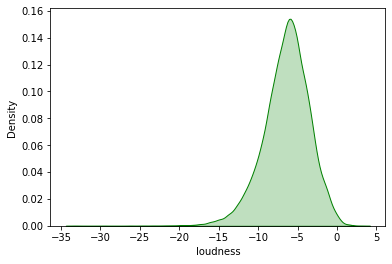

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
#before normalization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# KDE plot
sns.kdeplot(X["loudness"], color = "green",shade = True)
plt.show()
plt.figure()

In [ ]:
min_max_scaled_cols = ['loudness','tempo']
  
# apply normalization techniques
for column in min_max_scaled_cols:
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# view normalized data
X

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,0.712039,1,0.4200,0.059800,0.013400,0.0556,0.3890,0.610006
1,0.719,0.493,0.715710,1,0.0794,0.401000,0.000000,0.1180,0.1240,0.351848
2,0.850,0.893,0.782742,1,0.0623,0.013800,0.000004,0.3720,0.0391,0.986200
3,0.476,0.781,0.784742,1,0.1030,0.023700,0.000000,0.1140,0.1750,0.794595
4,0.798,0.624,0.703712,1,0.2930,0.217000,0.000000,0.1660,0.5910,0.554579
...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,0.772743,1,0.0304,0.031500,0.000345,0.1210,0.3940,0.567055
42301,0.517,0.768,0.696754,0,0.0479,0.022500,0.000018,0.2050,0.3830,0.566531
42302,0.361,0.821,0.828791,1,0.0505,0.026000,0.000242,0.3850,0.1240,0.597377
42303,0.477,0.921,0.782906,0,0.0392,0.000551,0.029600,0.0575,0.4880,0.567233


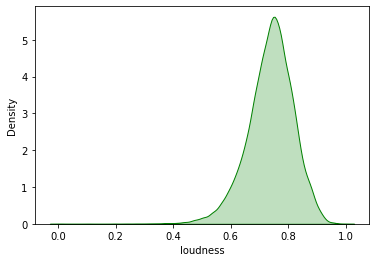

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
#after normalization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# KDE plot
sns.kdeplot(X["loudness"], color = "green",shade = True)
plt.show()
plt.figure()

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# columnTransformer = ColumnTransformer([('genre', OneHotEncoder(), [18])],     remainder='passthrough')
# X=np.array(columnTransformer.fit_transform(X),dtype=np.str)


In [ ]:
#One Hot Encoding
# y=pd.get_dummies(y)
# y

In [ ]:
print(X.shape)
print(y.shape)

(42305, 10)
(42305,)


In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split

# # training a DescisionTreeClassifier
# from sklearn.tree import DecisionTreeClassifier
# dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
# dtree_predictions = dtree_model.predict(X_test)
# # model accuracy for X_test 
# accuracy = dtree_model.score(X_test, y_test)
# print(accuracy)

# # creating a confusion matrix
# cm = confusion_matrix(y_test, dtree_predictions)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# model accuracy for X_test 
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

0.27493618228231065


In [ ]:
print(cm)

[[   0    0    0    0    0    0    0  432   96  158    0    0  474    0
     0]
 [   0    0    0    0    0    0    0   67    5  306    0    0   13    0
     0]
 [   0    0    0    0    0    0    0  565   18  156    0    0   26    0
     0]
 [   0    0    0    0    0    0    0   74    1   26    0    0    3    0
     0]
 [   0    0    0    0    0    0    0  373    1   63    0    0   11    0
     0]
 [   0    0    0    0    0    0    0  391    6  139    0    0   13    0
     0]
 [   0    0    0    0    0    0    0  295   21  131    0    0   59    0
     0]
 [   0    0    0    0    0    0    0 1174   25  170    0    0  103    0
     0]
 [   0    0    0    0    0    0    0   25  609  101    0    0    0    0
     0]
 [   0    0    0    0    0    0    0   37    0  418    0    0  267    0
     0]
 [   0    0    0    0    0    0    0    2    0    0    0    0  760    0
     0]
 [   0    0    0    0    0    0    0   64    0    6    0    0  697    0
     0]
 [   0    0    0    0    0    0    0    

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
# Prepare the data data
iris = dataset
X = X
y = y
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_6 <= 0.02
|   |--- feature_0 <= 0.61
|   |   |--- feature_9 <= 0.60
|   |   |   |--- feature_9 <= 0.56
|   |   |   |   |--- feature_9 <= 0.28
|   |   |   |   |   |--- feature_7 <= 0.85
|   |   |   |   |   |   |--- feature_5 <= 0.88
|   |   |   |   |   |   |   |--- feature_2 <= 0.81
|   |   |   |   |   |   |   |   |--- class: Rap
|   |   |   |   |   |   |   |--- feature_2 >  0.81
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.71
|   |   |   |   |   |   |   |   |   |--- class: RnB
|   |   |   |   |   |   |   |   |--- feature_1 >  0.71
|   |   |   |   |   |   |   |   |   |--- class: Rap
|   |   |   |   |   |   |--- feature_5 >  0.88
|   |   |   |   |   |   |   |--- class: Emo
|   |   |   |   |   |--- feature_7 >  0.85
|   |   |   |   |   |   |--- class: Trap Metal
|   |   |   |   |--- feature_9 >  0.28
|   |   |   |   |   |--- feature_6 <= 0.00
|   |   |   |   |   |   |--- feature_4 <= 0.13
|   |   |   |   |   |   |   |--- feature_1 <= 0.86
|   |   |   |   |   |   |   | 

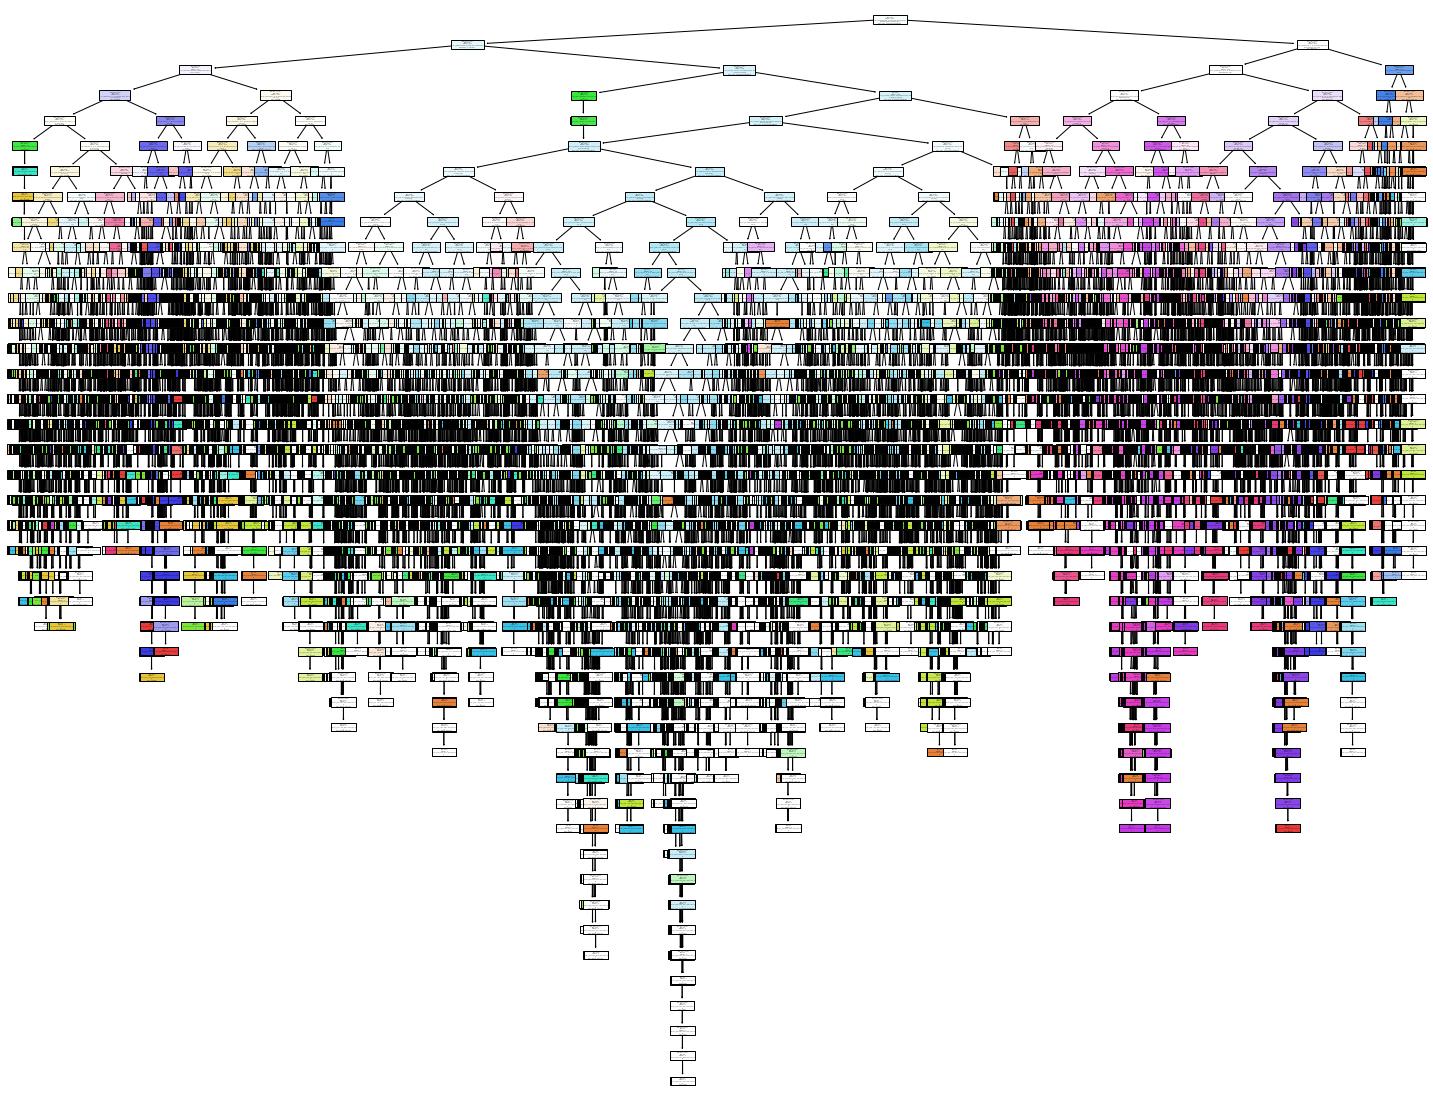

In [ ]:
fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(clf, feature_names=iris.genre, class_names=iris.song_name, filled=True)

In [ ]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

0.5592322964923891


In [ ]:
print(cm)

[[291  81  34   1  79  96  24 239  16  15  58  18  80  96  32]
 [ 10 216   6  12   8  39  11  14  14  27   0   3   0  15  16]
 [ 25  41 189  12  88  94  27 267   3   4   0   8   1   4   2]
 [  1  24   6   3  15  24   3  10   2   0   0  10   0   3   3]
 [  9  10  17   1 211  24  12 150   2   0   0   5   2   3   2]
 [ 19  49  63  19  71 167   9 130   3   4   0   8   0   7   0]
 [ 48  39  28   2  65  25  60 137   2  11   0   9   2  24  54]
 [ 69  48 145  10 199 115  53 748   6   3   3  16   4  15  38]
 [ 18   6   0   0   0   2  13   4 692   0   0   0   0   0   0]
 [ 13  23   0   1   0   2   2   1   0 557  45   0   0   1  77]
 [ 12   0   0   0   0   0   0   1   0   0 652   0  41  45  11]
 [  8  10   1   0   8   0   4  11   0   0   2 638  74  11   0]
 [ 18   0   0   0   1   0   0   1   0   0  52  75 523  40   0]
 [  8   4   0   0   2   1   4   4   0   0 186  11  34 469  12]
 [  9  21   2   0   4   1   8  19   0 132  42   0   1  13 499]]


In [ ]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test 
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

0.572374019098043


In [ ]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)

0.5360688285903376


In [ ]:
print(cm)

[[431  35  56   3  27  35  35 236  48  55  48  16  55  59  21]
 [ 27 232  15   2   3  25   4  13  30  31   0   1   0   8   0]
 [ 75  24 261   7  36  74  16 247   5   9   0   7   0   1   3]
 [  4  24  15   7   5  21   2  11   1   5   0   6   0   2   1]
 [ 56   7  47   1 135  17   8 161   2   3   0   5   1   3   2]
 [ 78  42 117  10  20 102  12 141   5   5   0  12   0   3   2]
 [ 84  17  39   3  12  14  32 177  20  22   1  18   1  17  49]
 [220  22 292   8 116  67  53 604  19   8   2  23   5  11  22]
 [ 15  12   5   0   2   5   4   7 658   5   3   0   0   0  19]
 [ 22  32   1   0   3   4   2   2   3 544  33   0   1  16  59]
 [ 24   0   0   0   0   0   0   1   0  21 602  18  39  48   9]
 [ 19   8   6   3   2   3   9  14   0   2  11 594  79  16   1]
 [ 19   0   0   0   0   0   0   0   0   2  56  76 529  28   0]
 [ 34  16   3   0   0   1   3   7   0  32  86  16  35 486  16]
 [ 25   8   7   1   5   3  11  18   3 151  46   8   2  10 453]]


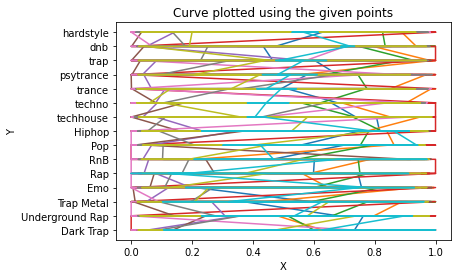

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
 
# Dataset
x = X
y = y
 
# Plotting the Graph
plt.plot(x, y)
plt.title("Curve plotted using the given points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()